<div style="text-align: center;">
    <h1><b>Practical Work 1 : introduction to numerical resolution of ODEs</b></h1>
</div>

*Authored in 2025 for educational purpose by S. Cardonna, Q. Richard, V. Lleras & P. Azerad. If you identify any issues or have suggestions for improvement, feel free to contact me.*  
  
**Introduction**  
For this first practical work, we first show how vector fields can give us a geometric intiuition of an ODE, using the software Wolfram Player. We will then solve numerically our first equation using an Euler's method. 


<div style="text-align: center;">
    <h2><b>Part 1 - Geometrical interpretation of an ODE</b></h2>
</div>
This section is focused on learning how to visualize the vector field corresponding to a differential equation.

You can download the `SlopeFields.cdf` file from Moodle and open it using the Wolfram Player application (menu: education) (Wolfram CDF Player is free and allows you to view `.cdf` files. However, to *create* `.cdf` files, you would need the Mathematica software, which our faculty does not currently have).  
The script `SlopeFields.cdf` lets you visualize the vector field (or slope field) associated with a differential equation:

$$ y' = f(x, y). $$

At each point $(x, y)$ on a grid, a small line segment is drawn with a slope equal to $f(x, y)$.  
Solving the differential equation for a specific initial condition means finding a curve $x \mapsto y(x)$ that satisfies $y'(x) = f(x, y(x))$. This means the slope of the tangent to the curve at $(x, y)$ matches the slope of the small line segment at that point. In other words, the curve is **tangent** to all the small line segments it crosses.  
The initial condition $y(x_0) = y_0$ simply means that the curve passes through the point $(x_0, y_0)$.

The `.cdf` script offers a menu of 14 functions. Take some time to experiment with a few of them, changing the parameters, initial condition, and reflecting on the visualized results to build your intuition about differential equations.  
Be sure to check the box **"show exact solution"**.

In several examples, if $f(x, y)$ does not depend on $x$, the differential equation is called **autonomous**. The vector field is then invariant under the translation $x \mapsto x + C$, and so is the set of solutions.  

For instance, if $f(x, y) = g(y/x)$, it does not depend on $y/x$. Under what type of transformation is the vector field invariant?  
**Answer:** Homothety with center $0$.  

In another example, if $f(x, y)$ does not depend on $y$, it is not a “true” differential equation but rather the search for a primitive of $f$. The vector field is invariant under the translation $y \mapsto y + C$.  

**Result:** When a vector field has a certain symmetry, the set of solutions exhibits the same symmetry.

<div style="text-align: center;">
    <h2><b>Part 2 - Order of convergence for Euler's method</b></h2>
</div>

Let us write a code that solve the typical ordinary differential equation
$$ y'=f(t,y),$$
using Euler's method. For now let us consider only the case $f(t,y)=y$.

#### Subpart 1 - First implementation ####
Here is the Python code to solve the ODE $y'=f(t,y)$.

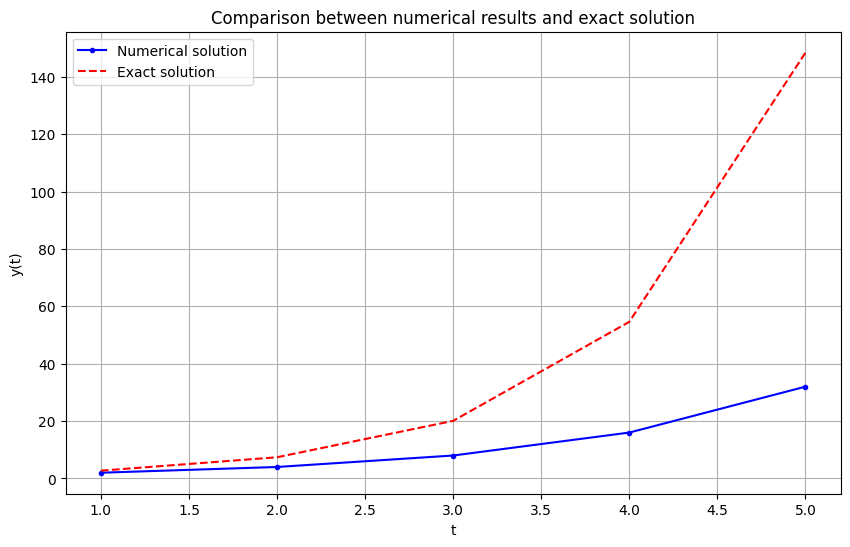

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t0, y0, t_final, h):
    """
    Solves the ODE y' = f(t,y) using Euler's method.
    
    Parameters:
    f (callable): The function f(t, y) defining the ODE y' = f(t, y).
    t0 (float): Initial time.
    y0 (float): Initial value.
    t_final (float): Final time.
    h (float): Time step size.

    Returns:
    t_vals (numpy.ndarray): Time values.
    num_vals (numpy.ndarray): Approximated solution values at each time step.
    """
    N = int((t_final - t0) / h) + 1
    t_vals = np.linspace(t0, t_final, N)
    num_vals = np.zeros(N)
    
    y = y0
    for j in range(N):
        y += h * f(t_vals[j], y)
        num_vals[j] = y
        t_vals[j] += h

    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 4
y0 = 1
h = (t_final - t0) / 4

# Define the ODE y' = y
f = lambda t, y: y

# Solve the ODE using Euler's method
t_vals, num_vals = euler_method(f, t0, y0, t_final, h)

# Exact solution
def exact_solution(t):
    """
    Computes the exact solution y(t) = exp(t).
    
    Parameters:
    t (numpy.ndarray): Time values.

    Returns:
    numpy.ndarray: Exact solution values.
    """
    return np.exp(t)

exact_vals = exact_solution(t_vals)

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t_vals, num_vals, label="Numerical solution", marker=".", color="blue")
plt.plot(t_vals, exact_vals, label="Exact solution", linestyle="--", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparison between numerical results and exact solution")
plt.legend()
plt.grid()
plt.show()

#### Subpart 2 - Refining step size and convergence tests ####
We now implement a refining of step size inside a loop, and compute the error
$$\max_n\vert y_n - \exp(t_n)\vert,$$
(we mostly refer to this as the $L^\infty$ error).

Refinement 1: h = 1.00000, Max error = 3.85982e+01
Refinement 2: h = 0.50000, Max error = 2.89692e+01
Refinement 3: h = 0.25000, Max error = 1.90710e+01
Refinement 4: h = 0.12500, Max error = 1.12590e+01
Refinement 5: h = 0.06250, Max error = 6.17511e+00
Refinement 6: h = 0.03125, Max error = 3.24264e+00


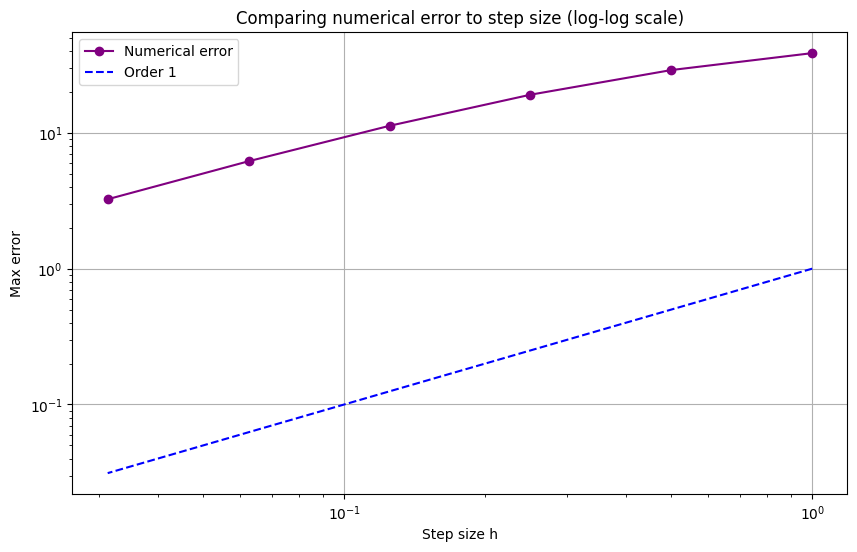

In [69]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t0, y0, t_final, h):
    N = int((t_final - t0) / h) + 1
    t_vals = np.linspace(t0, t_final, N)
    num_vals = np.zeros(N)
    
    y = y0
    for j in range(N):
        num_vals[j] = y
        y += h * f(t_vals[j], y)

    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 4
y0 = 1
h = (t_final - t0) / 4

# Define the ODE y' = y
f = lambda t, y: y

# Exact solution
def exact_solution(t):
    return np.exp(t)

# Refinement and error analysis
num_refinements = 6
errors = []
h_values = []

for i in range(num_refinements):
    h_current = h / (2 ** i)
    t_vals, num_vals = euler_method(f, t0, y0, t_final, h_current)
    exact_vals = exact_solution(t_vals)
    
    max_error = np.max(np.abs(num_vals - exact_vals))
    errors.append(max_error)
    h_values.append(h_current)

# Plot error vs step size in log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(h_values, errors, marker="o", label="Numerical error", color = "purple")
slope_1_x = np.array(h_values)
slope_1_y = slope_1_x
plt.loglog(slope_1_x, slope_1_y, linestyle="--", label="Order 1", color="blue")
plt.xlabel("Step size h")
plt.ylabel("Max error")
plt.title("Comparing numerical error to step size (log-log scale)")
plt.grid()
plt.legend();

for i, (h_val, error) in enumerate(zip(h_values, errors)):
    print(f"Refinement {i + 1}: h = {h_val:.5f}, Max error = {error:.5e}")


We can clearly observe that the numerical error line runs parallel to the slope 1 line, indicating that the method is indeed of order 1. To prove it theoretically, we need to show that the local truncation error is $\mathcal{O}(h^2)$. This has been done in Exercise 4 from TD1, so the reader can directly refer to this.

#### Subpart 3 - Changing the equation ####
We now change our implementation by considering now the function $f(t,y)=y^2$.

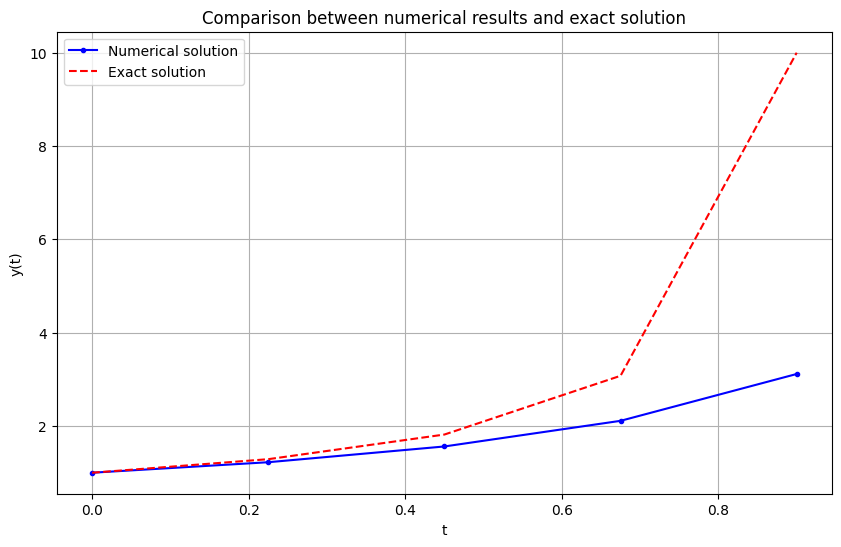

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t0, y0, t_final, h):
    N = int((t_final - t0) / h) + 1
    t_vals = np.linspace(t0, t_final, N)
    num_vals = np.zeros(N)
    
    y = y0
    for j in range(N):
        num_vals[j] = y
        y += h * f(t_vals[j], y)

    return t_vals, num_vals

# Parameters
t0 = 0
t_final = 0.9
y0 = 1
h = (t_final - t0) / 4

# Change the ODE to y' = y^2 
f = lambda t, y: y*y

t_vals, num_vals = euler_method(f, t0, y0, t_final, h)

def exact_solution(t):
    return 1 / (1 - t)

exact_vals = exact_solution(t_vals)

# Plot the new solution
plt.figure(figsize=(10, 6))
plt.plot(t_vals, num_vals, label="Numerical solution", marker=".", color="blue")
plt.plot(t_vals, exact_vals, label="Exact solution", linestyle="--", color="red")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparison between numerical results and exact solution")
plt.legend()
plt.grid()
plt.show()
